<h3>USFWS Pea Island Plot Group 6 Biol Counts</h4>

**Supports:**

dates=['2014-07-14 00:00:00','2014-07-15 00:00:00','2014-09-29 00:00:00','2015-04-28 00:00:00','2015-08-04 00:00:00','2015-10-20 00:00:00','2016-02-17 00:00:00','2016-05-10 00:00:00','2016-08-09 00:00:00','2016-10-13 00:00:00']

surveys=[201407,201407,201409,201504,201508,201510,201602,201605,201608,201610]

<br />
**Instructions for use:**
1. Export the table Biological Counts from the master geodatabase PIBM_Master.accdb to a tab separated text file. Title it PeaIsland_BioCounts.txt. If you elect to use a different name, be sure to make the change in the user inputs cell, below, to reflect the change. Too, If you should choose to export using a field separator other than the tab (x09) you'll have to update the Load Data File cell. 
2. Check the User Inputs cell, ensuring that the path and name of the exported bioCounts source file is correct. 
3. Cell -> Run All

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime

%matplotlib inline

In [107]:
### User Inputs:
datapath='/Users/paulp/GoogleDrive/projects/PeaIslandBeachMonitoring/data/'
fn='PeaIsland_BioCounts.txt'

latest_survey='022017'  # most recent survey - use for labeling plot graphics...

plotpath='/Users/paulp/GoogleDrive/projects/PeaIslandBeachMonitoring/plots/PlotGroup6/'

In [108]:
### Load Data File:

# read the new survey data (the most recent survey data that will be merged with the existing coverage 
# in the file BioCounts.csv)
df=pd.read_table(datapath+fn, header=0 ).fillna(0)
df.columns=["key","BIO_UID","sheet_code","sample_date","transect_id","sample_number","ghost_crabs",
"small_mole_crabs","med_mole_crabs","large_mole_crabs","coquina","amphipods","worms"]

## create and populate new group column (field) based on transect id type (e.g., control or transect):
df.loc[df['transect_id'].str[0] == 'C', 'group'] ='control'
df.loc[df['transect_id'].str[0] =='T', 'group'] = 'treatment'

# convert the ISO 8601 datetime field to Python datetime object and then to integers as in the surveys list
# in the Supports section of this notebook. These converted dates are then used to populate a newly created 
# survey field in df (use a lambda func to pull it off):
try:
    datetime2survey = lambda i: datetime.datetime.strptime(i,"%Y-%m-%d %H:%M:%S").strftime('%Y%m')
    df['survey'] = df['sample_date'].apply( datetime2survey )
except ValueError as e:
    print('Oops! ', str(e))

df.sort_values(by=['survey'], inplace=True)
#df

<h3>Plotting Section</h3>

In [109]:
### some general settings, common to all plots...
sns.set_color_codes("pastel")
sns.despine(offset=10, trim=True)

**Ghost Crabs**

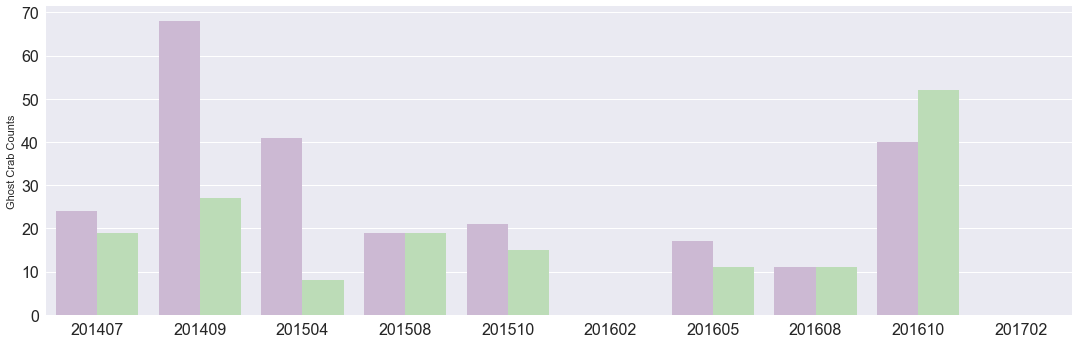

In [110]:
g = sns.factorplot(x="survey", y="ghost_crabs", hue="group", data=df,
                    size=5, aspect=3, estimator=sum, kind="bar", ci=None, legend=False, palette="PRGn")

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
g.set_axis_labels("", "Ghost Crab Counts")
plt.savefig(plotpath+'Ghost_Crab_counts_'+latest_survey+'.jpg', dpi=300)

**Small Mole Crabs**

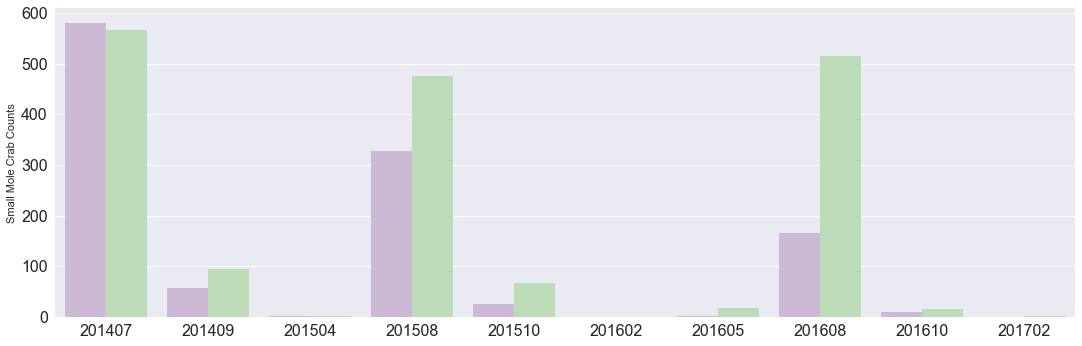

In [111]:
g = sns.factorplot(x="survey", y="small_mole_crabs", hue="group", data=df,
                    size=5, aspect=3, estimator=sum, kind="bar", ci=None, legend=False, palette="PRGn")

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
g.set_axis_labels("", "Small Mole Crab Counts")
plt.savefig(plotpath+'Sample_Sm_Mole_Crab_counts_'+latest_survey+'.jpg', dpi=300)

**Medium Mole Crabs**

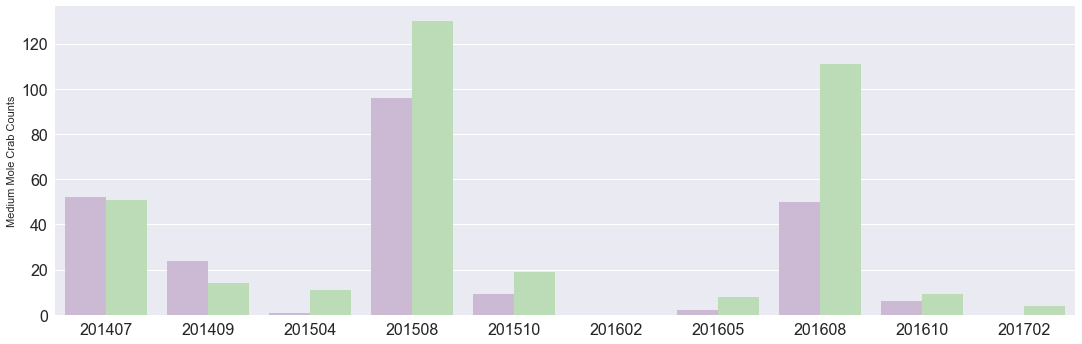

In [112]:
g = sns.factorplot(x="survey", y="med_mole_crabs", hue="group", data=df,
                    size=5, aspect=3, estimator=sum, kind="bar", ci=None, legend=False, palette="PRGn")

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
g.set_axis_labels("", "Medium Mole Crab Counts")
plt.savefig(plotpath+'Sample_Med_Mole_Crab_counts_'+latest_survey+'.jpg', dpi=300)

**Large Mole Crabs**

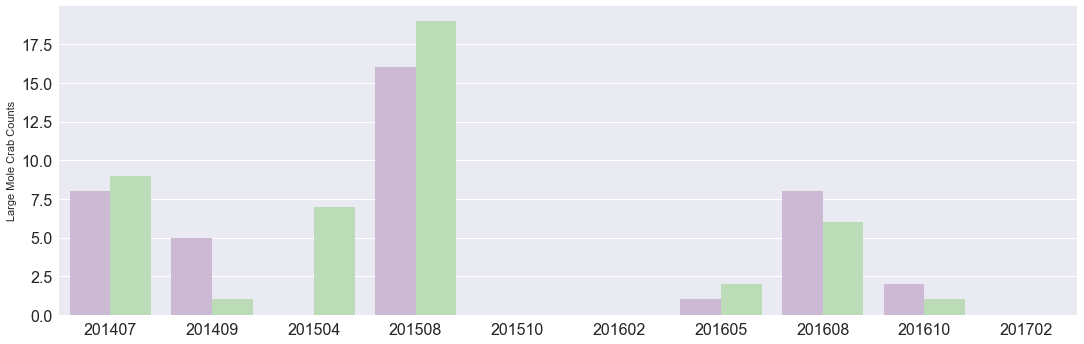

In [113]:
g = sns.factorplot(x="survey", y="large_mole_crabs", hue="group", data=df,
                    size=5, aspect=3, estimator=sum, kind="bar", ci=None, legend=False, palette="PRGn")

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
g.set_axis_labels("", "Large Mole Crab Counts")
plt.savefig(plotpath+'Sample_Lg_Mole_Crab_counts_'+latest_survey+'.jpg', dpi=300)

**Coquina Clams**

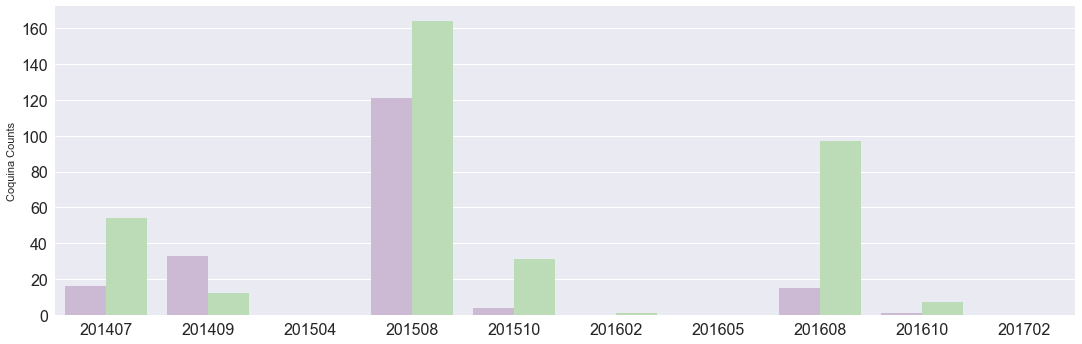

In [114]:
g = sns.factorplot(x="survey", y="coquina", hue="group", data=df,
                    size=5, aspect=3, estimator=sum, kind="bar", ci=None, legend=False, palette="PRGn")

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
g.set_axis_labels("", "Coquina Counts")
plt.savefig(plotpath+'Coquina_counts_'+latest_survey+'.jpg', dpi=300)

**Amphipods**

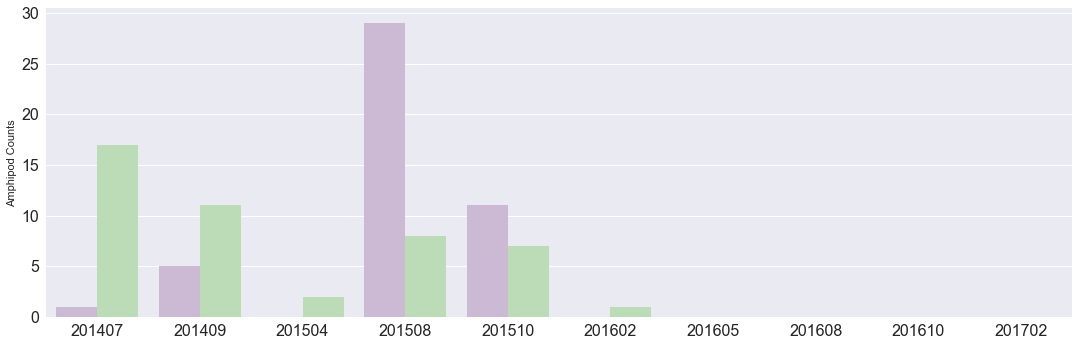

In [115]:
g = sns.factorplot(x="survey", y="amphipods", hue="group", data=df,
                    size=5, aspect=3, estimator=sum, kind="bar", ci=None, legend=False, palette="PRGn")

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
g.set_axis_labels("", "Amphipod Counts")
plt.savefig(plotpath+'amphipod_counts_'+latest_survey+'.jpg', dpi=300)

**Polychaete Worms**

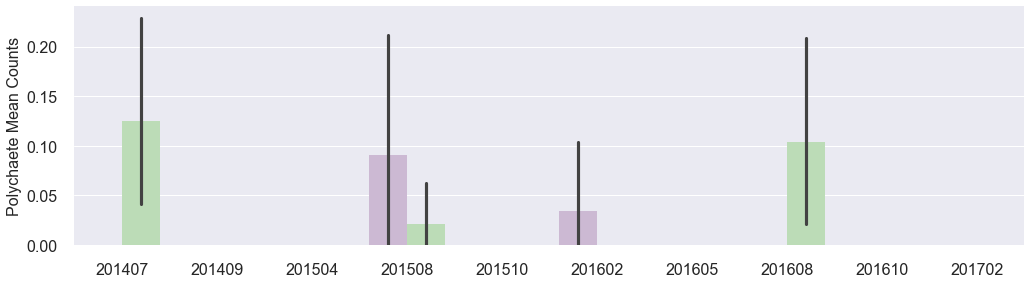

In [116]:
### Bar plot means with 95% CI

figpg = plt.figure(figsize=(15,5))
axspg = figpg.add_subplot(1,1,1)
figpg.tight_layout(pad=5.1, w_pad=0.5, h_pad=2.0)

sns.set_color_codes("pastel")
axb = sns.barplot(x="survey", y="worms", hue="group", data=df, palette="PRGn")     
sns.despine(offset=10, trim=True)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
axb.set_xlabel('')
axb.set_ylabel("Polychaete Mean Counts", fontsize=16)     
axb.legend_.remove()

plt.savefig(plotpath+'Sample_Polychaete_means_'+latest_survey+'.jpg', dpi=300)     

**The End**